### 池化层
```
池化的作用则体现在降采样：保留显著特征、降低特征维度，增大kernel的感受野。 另外一点值得注意：pooling也可以提供一些旋转不变性。 池化层可对提取到的特征信息进行降维，一方面使特征图变小，简化网络计算复杂度并在一定程度上避免过拟合的出现；一方面进行特征压缩，提取主要特征。

### 最大池化：nn.MaxPool2d()
```python
nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```
```
    kernel_size：池化核尺寸
    stride：步长，通常与 kernel_size 一致
    padding：填充宽度，主要是为了调整输出的特征图大小，一般把 padding 设置合适的值后，保持输入和输出的图像尺寸不变。
    dilation：池化间隔大小，默认为1。常用于图像分割任务中，主要是为了提升感受野
    ceil_mode：默认为 False，尺寸向下取整。为 True 时，尺寸向上取整
    return_indices：为 True 时，返回最大池化所使用的像素的索引，这些记录的索引通常在反最大池化时使用，把小的特征图反池化到大的特征图时，每一个像素放在哪个位置。

下图 (a) 表示反池化，(b) 表示上采样，(c) 表示反卷积。

![image](https://image.zhangxiann.com/20200629114927.png "image")

池化前尺寸:torch.Size([1, 3, 512, 512])
池化后尺寸:torch.Size([1, 3, 256, 256])


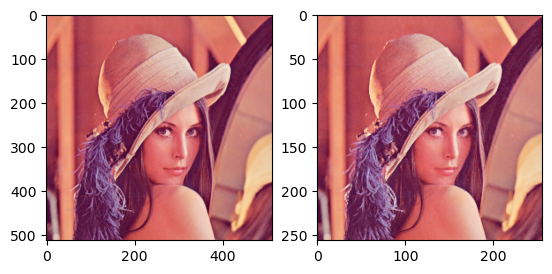

In [3]:
# 最大池化
import os
import torch
import torch.nn as nn
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image
from common_tools import transform_invert, set_seed

set_seed(1)  # 设置随机种子

# ================================= load img ==================================
path_img = 'image/lena.png'
img = Image.open(path_img).convert('RGB')  # 0~255

# convert to tensor
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img)
img_tensor.unsqueeze_(dim=0)    # C*H*W to B*C*H*W

# ================================= create convolution layer ==================================

# ================ maxpool
flag = 1
# flag = 0
if flag:
    maxpool_layer = nn.MaxPool2d((2, 2), stride=(2, 2))   # input:(i, o, size) weights:(o, i , h, w)
    img_pool = maxpool_layer(img_tensor)

print("池化前尺寸:{}\n池化后尺寸:{}".format(img_tensor.shape, img_pool.shape))
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_pool)
plt.subplot(121).imshow(img_raw)
plt.show()

### 平均池化 nn.AvgPool2d()
```python
torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)
```
```
    kernel_size：池化核尺寸
    stride：步长，通常与 kernel_size 一致
    padding：填充宽度，主要是为了调整输出的特征图大小，一般把 padding 设置合适的值后，保持输入和输出的图像尺寸不变。
    dilation：池化间隔大小，默认为1。常用于图像分割任务中，主要是为了提升感受野
    ceil_mode：默认为 False，尺寸向下取整。为 True 时，尺寸向上取整
    count_include_pad：在计算平均值时，是否把填充值考虑在内计算
    divisor_override：除法因子。在计算平均值时，分子是像素值的总和，分母默认是像素值的个数。如果设置了 divisor_override，把分母改为 divisor_override。


池化前尺寸:torch.Size([1, 3, 512, 512])
池化后尺寸:torch.Size([1, 3, 256, 256])


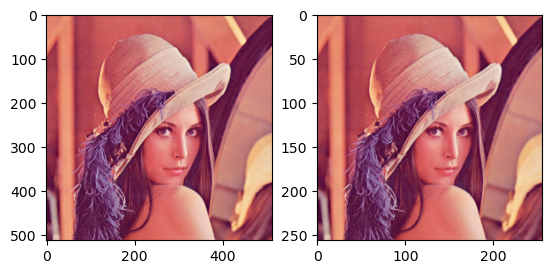

In [4]:
# 最大池化
import os
import torch
import torch.nn as nn
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image
from common_tools import transform_invert, set_seed

set_seed(1)  # 设置随机种子

# ================================= load img ==================================
path_img = 'image/lena.png'
img = Image.open(path_img).convert('RGB')  # 0~255

# convert to tensor
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img)
img_tensor.unsqueeze_(dim=0)    # C*H*W to B*C*H*W

# ================================= create convolution layer ==================================

# ================ maxpool
flag = 1
# flag = 0
if flag:
    maxpool_layer = nn.AvgPool2d((2, 2), stride=(2, 2))   # input:(i, o, size) weights:(o, i , h, w)
    img_pool = maxpool_layer(img_tensor)

print("池化前尺寸:{}\n池化后尺寸:{}".format(img_tensor.shape, img_pool.shape))
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_pool)
plt.subplot(121).imshow(img_raw)
plt.show()

In [5]:
img_tensor = torch.ones((1, 1, 4, 4))
avgpool_layer = nn.AvgPool2d((2, 2), stride=(2, 2))
img_pool = avgpool_layer(img_tensor)
print("raw_img:\n{}\npooling_img:\n{}".format(img_tensor, img_pool))

raw_img:
tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])
pooling_img:
tensor([[[[1., 1.],
          [1., 1.]]]])


### nn.MaxUnpool2d()
```python
nn.MaxUnpool2d(kernel_size, stride=None, padding=0)
```
```
功能是对二维信号（图像）进行最大值反池化，主要参数如下：
    kernel_size：池化核尺寸
    stride：步长，通常与 kernel_size 一致
    padding：填充宽度

In [6]:
# pooling
img_tensor = torch.randint(high=5, size=(1, 1, 4, 4), dtype=torch.float)
maxpool_layer = nn.MaxPool2d((2, 2), stride=(2, 2), return_indices=True)
img_pool, indices = maxpool_layer(img_tensor)

# unpooling
img_reconstruct = torch.randn_like(img_pool, dtype=torch.float)
maxunpool_layer = nn.MaxUnpool2d((2, 2), stride=(2, 2))
img_unpool = maxunpool_layer(img_reconstruct, indices)

print("raw_img:\n{}\nimg_pool:\n{}".format(img_tensor, img_pool))
print("img_reconstruct:\n{}\nimg_unpool:\n{}".format(img_reconstruct, img_unpool))

raw_img:
tensor([[[[0., 4., 4., 3.],
          [3., 3., 1., 1.],
          [4., 2., 3., 4.],
          [1., 3., 3., 0.]]]])
img_pool:
tensor([[[[4., 4.],
          [4., 4.]]]])
img_reconstruct:
tensor([[[[-1.0276, -0.5631],
          [-0.8923, -0.0583]]]])
img_unpool:
tensor([[[[ 0.0000, -1.0276, -0.5631,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [-0.8923,  0.0000,  0.0000, -0.0583],
          [ 0.0000,  0.0000,  0.0000,  0.0000]]]])


/Users/tianyongliu/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/torch/nn/functional.py:749: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


### 线性层
```
线性层又称为全连接层，其每个神经元与上一个层所有神经元相连，实现对前一层的线性组合或线性变换。

In [9]:
inputs = torch.tensor([[1., 2, 3]])
linear_layer = nn.Linear(3, 4)
linear_layer.weight.data = torch.tensor([
                                        [1., 1., 1.],
                                        [2., 2., 2.],
                                        [3., 3., 3.],
                                        [4., 4., 4.]])

linear_layer.bias.data.fill_(0.5)

output = linear_layer(inputs)
print(inputs, inputs.shape)
print(linear_layer.weight.data, linear_layer.weight.data.shape)
print(output, output.shape)

tensor([[1., 2., 3.]]) torch.Size([1, 3])
tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.]]) torch.Size([4, 3])
tensor([[ 6.5000, 12.5000, 18.5000, 24.5000]], grad_fn=<AddmmBackward0>) torch.Size([1, 4])


### 激活函数层
神经网络如果仅仅是由线性的卷积运算堆叠组成，则其无法形成复杂的表达空间，也就很难提取出高语义的信息，因此还需要加入非线性映射，又称激活函数，可以逼近任意的非线性函数，以提升整个神经网络的表达能力，在物体检测任务中，常用的就好函数有Sigmoid、ReLU及Softmax函数

### nn.Sigmoid

计算公式：$y=\frac{1}{1+e^{-x}}$

梯度公式：$y^{\prime}=y *(1-y)$

特性：
输出值在(0,1)，符合概率
导数范围是 [0, 0.25]，容易导致梯度消失
输出为非 0 均值，破坏数据分布

![image](https://image.zhangxiann.com/20200629233457.png "image")

### nn.tanh

计算公式：$y=\frac{\sin x}{\cos x}=\frac{e^{x}-e^{-x}}{e^{-}+e^{-x}}=\frac{2}{1+e^{-2 x}}+1$

梯度公式：$y^{\prime}=1-y^{2}$

特性：
输出值在(-1, 1)，数据符合 0 均值
导数范围是 (0,1)，容易导致梯度消失


![image](https://image.zhangxiann.com/20200629233641.png "image")

### nn.ReLU(修正线性单元)
计算公式：$y=max(0, x)$

梯度公式：$y^{\prime}=\left{\begin{array}{ll}1, & x>0  u n d \text { ef ined, } & x=0  0, & x<0\end{array}\right.$

特性：
输出值均为正数，负半轴的导数为 0，容易导致死神经元
导数是 1，缓解梯度消失，但容易引发梯度爆炸

![image](https://image.zhangxiann.com/20200629233711.png "image")

针对 RuLU 会导致死神经元的缺点，出现了下面 3 种改进的激活函数。
![image](https://image.zhangxiann.com/20200629233342.png "image")